# Seaborn Box plots

Box plots allows to detect outliers and to look from different point of view on your data.

##  1.Preparing Data

### 1.1 Importing modules

In [1]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

### 1.2 Load DataFrame and data inspections:

In [2]:
df = sns.load_dataset('mpg').dropna()
df.shape

<IPython.core.display.Javascript object>

(392, 9)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
sns.set_style('whitegrid')

<IPython.core.display.Javascript object>

In [5]:
df['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

Most cars have 4, 6 or 8 cylinders, cars with 3 and 5 cylinders are really unique and only cars with even number of cylinders will stay:

In [6]:
df = df[df.cylinders.isin([4,6,8])]

## 2. Visualizations

### 2.1 Box plots - basics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

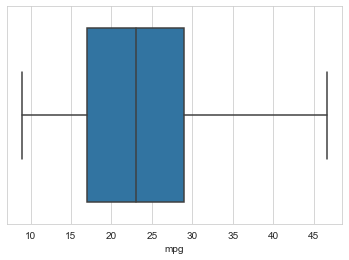

In [7]:
sns.boxplot(df['mpg'])
plt.show()

In [8]:
df.describe().mpg

count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

From plot and table above we can see that **25 % of data lays between 17 and mean** and **rest is distributed above the mean**, there'a also some otuliners as value **9 - minimal value** and **value - 46.6** - the maximal value

### 2.2 Using categorical data

<IPython.core.display.Javascript object>

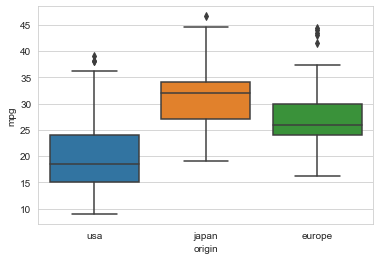

In [9]:
sns.boxplot(x=df.origin, y=df.mpg);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

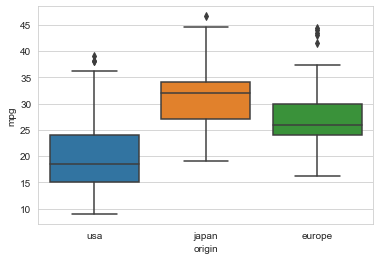

In [10]:
sns.boxplot(data=df, x='origin', y='mpg')
plt.show()

### 2.3 Hue

#### By cylinders

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='origin', ylabel='mpg'>

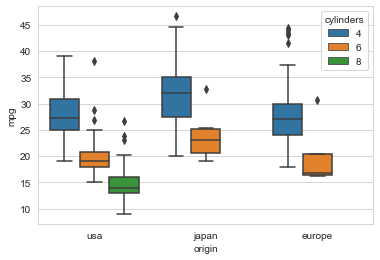

In [11]:
sns.boxplot(data=df, x='origin', y='mpg', hue='cylinders')

USA mpg looks terrible at the plot before this one above - but from this point of view it's visible that **only cars from USA have 8 cylinders** - they need the biggest amount of fuel

#### By Model Year

In [12]:
df.model_year.describe()

count    385.000000
mean      75.961039
std        3.692058
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

In [13]:
df['newer_model'] = df['model_year'] > 76

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='origin', ylabel='mpg'>

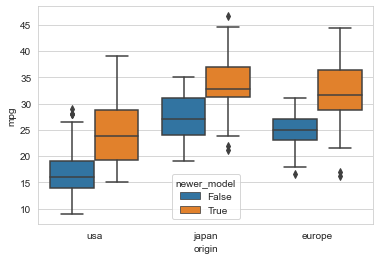

In [14]:
sns.boxplot(data=df, x='origin', y='mpg', hue='newer_model')

Conclusions: Newer cars(made after 1976) have more miles per galon than older cars(made in and before 1976)

## 3.Styling Options

### 3.1 Order

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

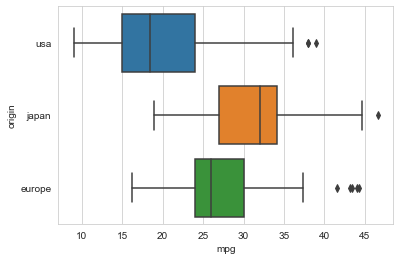

In [15]:
sns.boxplot(data=df, x='mpg', y='origin') #  horizontal

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

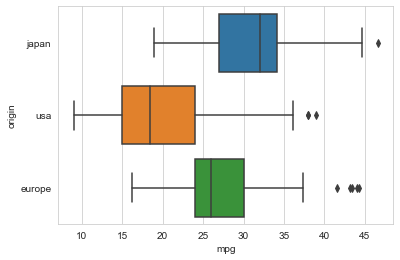

In [16]:
sns.boxplot(x='mpg', y='origin', data=df, order=['japan', 'usa', 'europe'])

**Order kwarg** allows to order the data in your own order

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

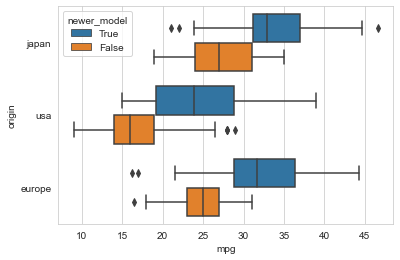

In [17]:
sns.boxplot(x='mpg', y='origin', data=df, order=['japan', 'usa', 'europe'],
           hue='newer_model', hue_order=[True, False])

**Hue_order** allows to control which one of boxes are on top

### Color

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

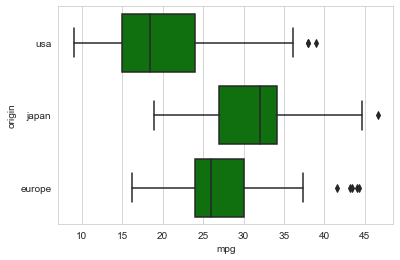

In [18]:
sns.boxplot(x='mpg', y='origin',color='g', data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

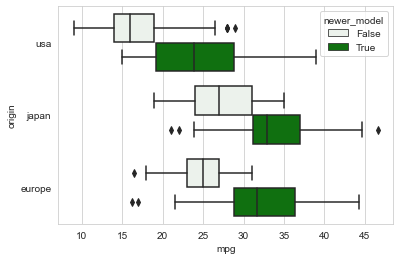

In [19]:
sns.boxplot(x='mpg', y='origin', data=df, color='g', hue='newer_model')

### Width

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

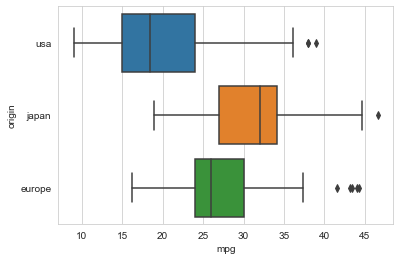

In [20]:
sns.boxplot(x='mpg', y='origin', data=df) # default width = .5

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

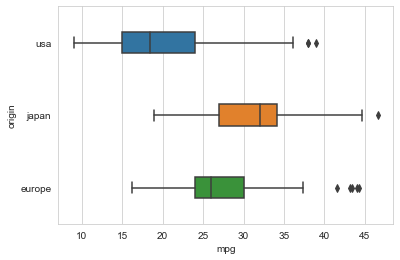

In [21]:
sns.boxplot(x='mpg', y='origin', data=df, width=.3)

Width of boxplots changes

### linewidth

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

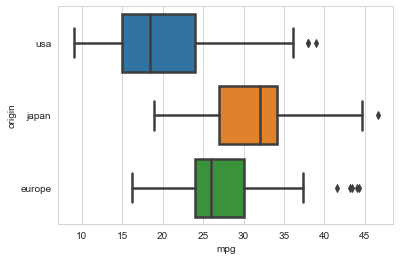

In [22]:
sns.boxplot(x='mpg', y='origin', data=df, linewidth=2.5) # default linewidth is 1.2

### whis (whisker)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

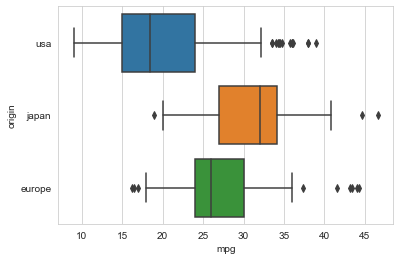

In [23]:
sns.boxplot(x='mpg', y='origin', data=df, whis=1)

More outliners are visible in this case

### fliersize - size of the diamonds representing outliners

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

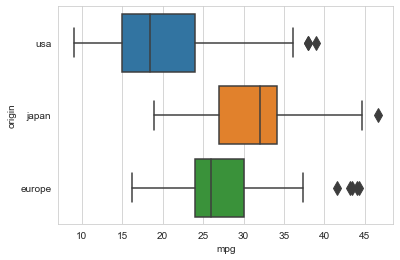

In [24]:
sns.boxplot(x='mpg', y='origin', data=df, fliersize=10)

### showcaps - from matploblib

This styling is not avalible in seaborn documentation but it inherits from matplotlib libary

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mpg', ylabel='origin'>

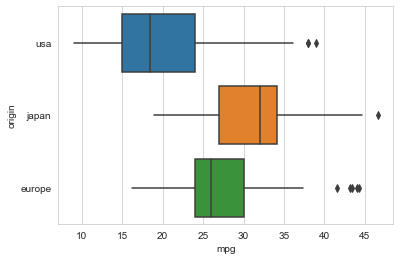

In [25]:
sns.boxplot(x='mpg', y='origin', data=df, showcaps=False)